In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras import layers
from tensorflow import keras
from keras import datasets, layers, models, regularizers
from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
# from tensorflow.keras import regularizers

# Load Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = '/content/drive/My Drive/Colab Notebooks/HAR'
hapt = '/HAPT Data Set'       # Human Activity Postural Transitions data set
har = '/UCI HAR Dataset'      # Human Activity Recognition data set

In [6]:
features = list()
with open(path + har + '/features.txt') as f:
  for line in f:
    features.append(line.split('\n')[0])

In [7]:
path1 = path + har

x_train = pd.read_csv(path1 + "/train/X_train.txt", delim_whitespace=True, names=features)
y_train = pd.read_csv(path1 + "/train/y_train.txt", header=None, encoding='utf-16')

x_test = pd.read_csv(path1 + "/test/X_test.txt", delim_whitespace=True, names=features)
y_test = pd.read_csv(path1 + "/test/y_test.txt", header=None, encoding='utf-16')

In [8]:
  # zero-offset class values
  y_train = y_train - 1
  y_test = y_test - 1
  # # one hot encode y
  # y_train = to_categorical(y_train)
  # y_test = to_categorical(y_test)

# Split the train set to train and validaiton

In [9]:
# x_train = (x_train - x_train.mean()) / x_train.std() # standardize data
# x_test = (x_test - x_test.mean()) / x_test.std() # standardize data

x_train['labels'] = y_train
training_data = x_train.copy(deep=True)
x_train = x_train.drop(['labels'], axis=1)

In [10]:
train_data, validation_data = train_test_split(training_data, test_size=0.3, random_state=0)

y_train_data = train_data['labels']
train_data = train_data.drop(['labels'], axis=1)

y_validation_data = validation_data['labels']
validation_data = validation_data.drop(['labels'], axis=1)

# Create the simple neural network model

In [11]:
model2 = keras.Sequential([
    layers.Dense(100, activation='relu'),
    # layers.Dropout(0.3),
    layers.Dense(6, activation='softmax', name="output_layer") # 24
])

In [12]:
opt2 = keras.optimizers.RMSprop(learning_rate = 0.006)

model2.compile(optimizer=opt2,
               loss='SparseCategoricalCrossentropy',
               metrics=['accuracy'])

In [13]:
history2 = model2.fit(train_data,
                     y_train_data,
                     epochs=30,
                    #  batch_size=512,
                     validation_data=(validation_data, y_validation_data))

Epoch 1/30
161/161 [==============================] - 6s 5ms/step - loss: 0.9191 - accuracy: 0.7289 - val_loss: 0.2754 - val_accuracy: 0.8976
Epoch 2/30
161/161 [==============================] - 1s 4ms/step - loss: 0.2981 - accuracy: 0.8749 - val_loss: 0.2235 - val_accuracy: 0.9089
Epoch 3/30
161/161 [==============================] - 1s 4ms/step - loss: 0.2188 - accuracy: 0.9096 - val_loss: 0.1182 - val_accuracy: 0.9492
Epoch 4/30
161/161 [==============================] - 1s 3ms/step - loss: 0.1666 - accuracy: 0.9302 - val_loss: 0.2832 - val_accuracy: 0.8844
Epoch 5/30
161/161 [==============================] - 1s 3ms/step - loss: 0.1557 - accuracy: 0.9400 - val_loss: 0.1111 - val_accuracy: 0.9488
Epoch 6/30
161/161 [==============================] - 1s 3ms/step - loss: 0.1237 - accuracy: 0.9539 - val_loss: 0.0967 - val_accuracy: 0.9578
Epoch 7/30
161/161 [==============================] - 1s 4ms/step - loss: 0.1228 - accuracy: 0.9541 - val_loss: 0.0961 - val_accuracy: 0.9624
Epoch 

Mean validation accuracy: 0.960


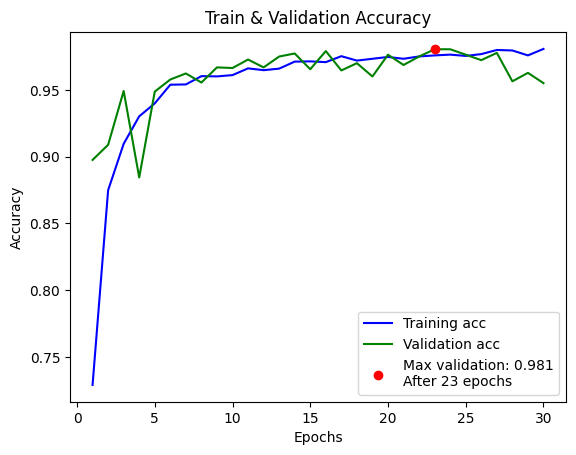

In [14]:
# plotting the training and validation accuracy
epochs = range(1, len(history2.history['val_loss']) + 1)

val_accuracy2 = np.array(history2.history["val_accuracy"])
argmax2 = val_accuracy2.argmax()
val_max2 = val_accuracy2[argmax2]
print(f"Mean validation accuracy: {val_accuracy2.mean():.3f}")

plt.clf()
plt.plot(epochs, history2.history["accuracy"], "b", label="Training acc")
plt.plot(epochs, val_accuracy2, "g", label="Validation acc")
plt.plot(epochs[argmax2], val_max2, "ro", label=f"Max validation: {val_max2:.3f}\nAfter {epochs[argmax2]} epochs")
plt.title("Train & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
model2.evaluate(x_test, y_test)

93/93 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.9158


[0.44804200530052185, 0.9158466458320618]